In [1]:
import pandas as pd
import pandas_ta as ta
mydf = pd.DataFrame()
mydf.ta.indicators()
help(ta.atr)

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [2]:
import pandas as pd
df = pd.read_csv("USDCHF_Candlestick_4_Hour_ASK_05.05.2003-19.10.2019.csv")
df.tail()

,Local time,Open,High,Low,Close,Volume
36084,19.10.2019 05:00:00.000 GMT+0800,0.98462,0.98462,0.98462,0.98462,0.0
36085,19.10.2019 09:00:00.000 GMT+0800,0.98462,0.98462,0.98462,0.98462,0.0
36086,19.10.2019 13:00:00.000 GMT+0800,0.98462,0.98462,0.98462,0.98462,0.0
36087,19.10.2019 17:00:00.000 GMT+0800,0.98462,0.98462,0.98462,0.98462,0.0
36088,19.10.2019 21:00:00.000 GMT+0800,0.98462,0.98462,0.98462,0.98462,0.0


In [3]:
#Check if any zero volume are available
indexzeros = df[df['Volume']==0].index

df.drop(indexzeros, inplace=True)
df.loc[(df["Volume"]==0)]
df.isna().sum()

Local time    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

In [4]:
import numpy as np
import pandas_ta as ta
#df.ta.indicators()
#help(ta.atr)
df['ATR']=df.ta.atr(length=20)
df['RSI']=df.ta.rsi()
df['Average']=df.ta.midprice(length=1) #midprice
df['MA40']=df.ta.sma(length=40)
df['MA80']=df.ta.sma(length=80)
df['MA160']=df.ta.sma(length=160)

from scipy.stats import linregress
def get_slope(array):
    y=np.array(array)
    x=np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!
df['slopeMA40'] = df['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA80'] = df['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA160'] = df['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [5]:
df.tail()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
36079,18.10.2019 09:00:00.000 GMT+0800,0.98760,0.98800,0.98721,0.98739,9600.3901,0.002046,28.037437,0.987605,0.995346,0.995749,0.993778,-0.000149,-0.000098,-0.000031,-0.001048,-1.148241
36080,18.10.2019 13:00:00.000 GMT+0800,0.98738,0.98911,0.98658,0.98812,13590.8197,0.002070,31.626736,0.987845,0.995149,0.995622,0.993745,-0.000163,-0.000117,-0.000033,-0.000504,0.866281
36081,18.10.2019 17:00:00.000 GMT+0800,0.98812,0.98919,0.98583,0.98731,16145.1098,0.002135,29.847793,0.987510,0.994931,0.995473,0.993710,-0.000178,-0.000130,-0.000034,-0.000039,0.910248
36082,18.10.2019 21:00:00.000 GMT+0800,0.98729,0.98811,0.98464,0.98473,24720.9399,0.002201,25.020318,0.986375,0.994678,0.995271,0.993653,-0.000200,-0.000144,-0.000039,-0.000207,-0.412721
36083,19.10.2019 01:00:00.000 GMT+0800,0.98473,0.98610,0.98424,0.98462,12850.0303,0.002184,24.835883,0.985170,0.994418,0.995073,0.993597,-0.000222,-0.000161,-0.000043,-0.000517,-0.823767


# Target categories

In [6]:
#Target flexible way
pipdiff = 450*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL

def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

In [7]:
# mytarget(barsfront to take into account, dataframe)
df['mytarget'] = mytarget(16, df)
df.head()

,Local time,Open,High,Low,Close,Volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
2,05.05.2003 05:00:00.000 GMT+0800,1.34441,1.34524,1.34308,1.34346,32046.7002,NaN,NaN,1.344160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,05.05.2003 09:00:00.000 GMT+0800,1.34377,1.34672,1.34353,1.34572,31066.7998,NaN,NaN,1.345125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,05.05.2003 13:00:00.000 GMT+0800,1.34581,1.34905,1.34511,1.34830,30466.1997,NaN,NaN,1.347080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,05.05.2003 17:00:00.000 GMT+0800,1.34817,1.34966,1.34670,1.34867,31758.5996,NaN,NaN,1.348180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,05.05.2003 21:00:00.000 GMT+0800,1.34855,1.34948,1.34117,1.34351,88658.6016,NaN,NaN,1.345325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Quick analysis example

C:\Users\user\AppData\Local\Temp\ipykernel_16340\532070288.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


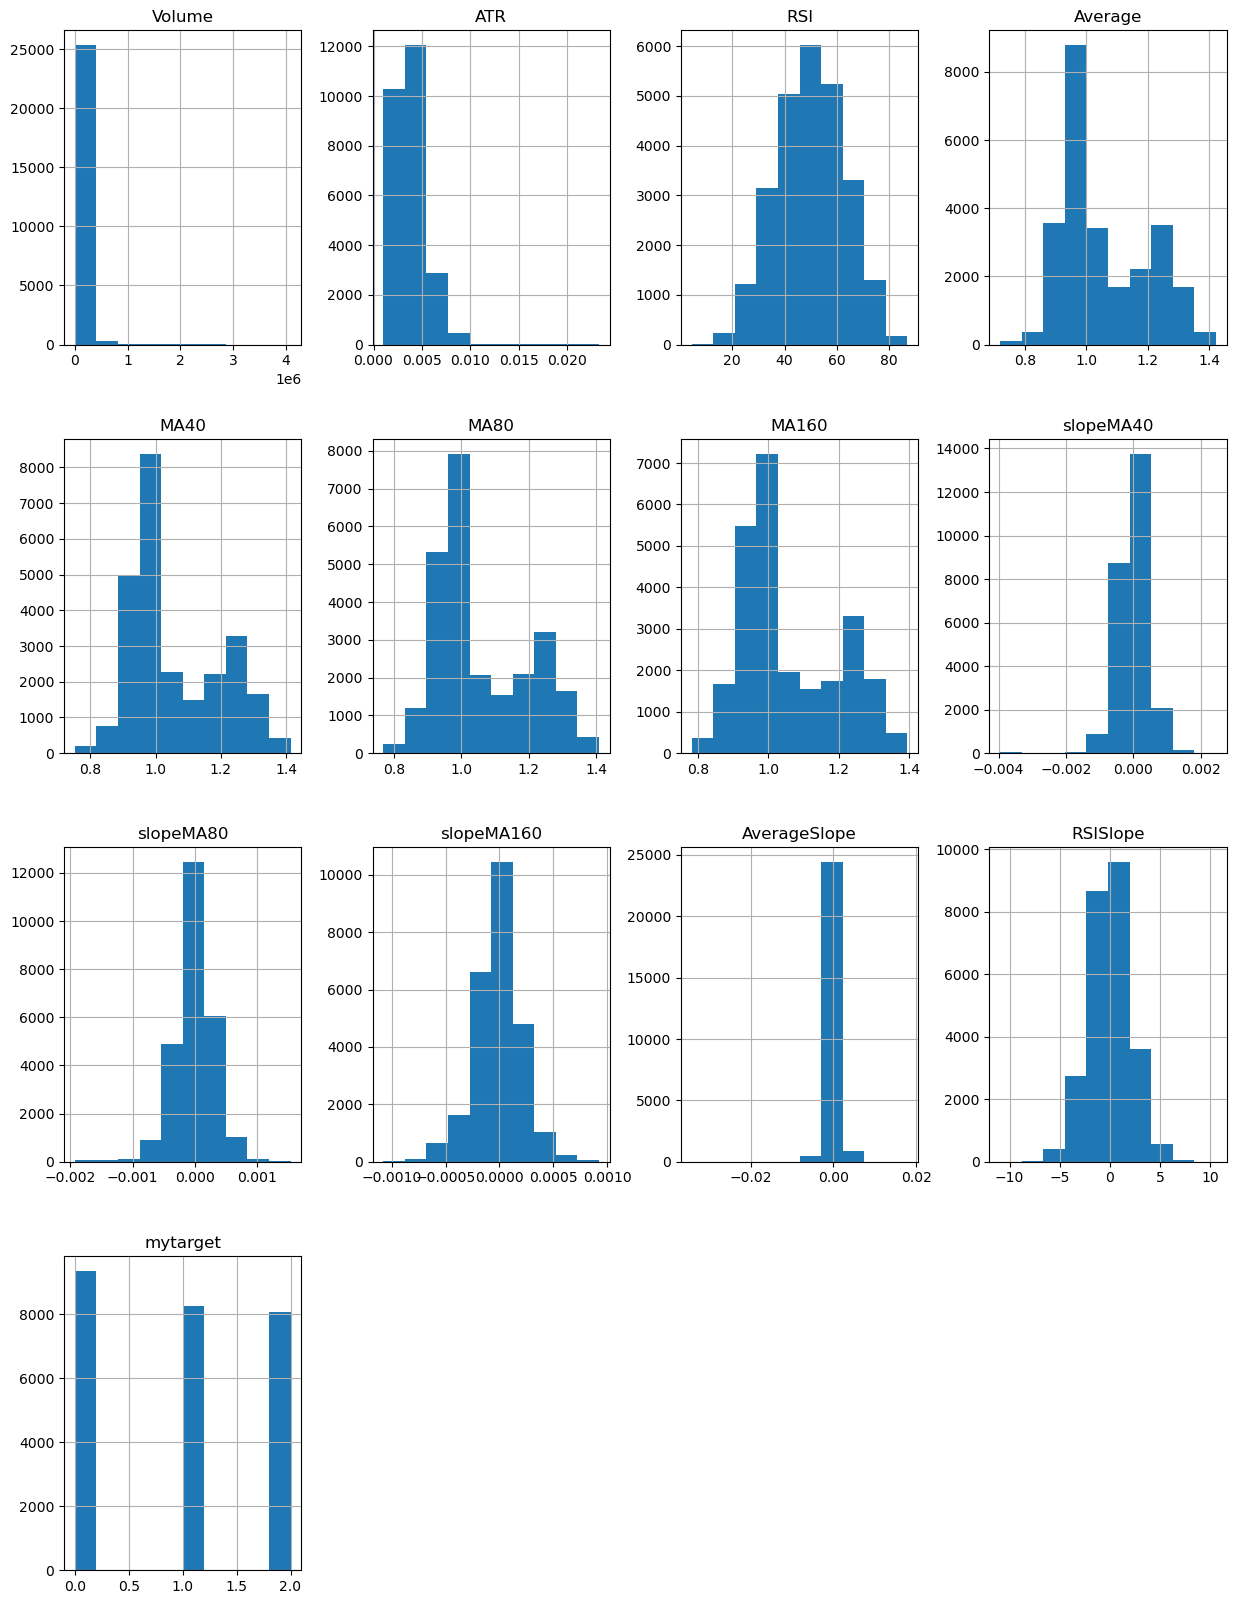

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= df[['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

# Can we use the RSI alone as a trend indicator?

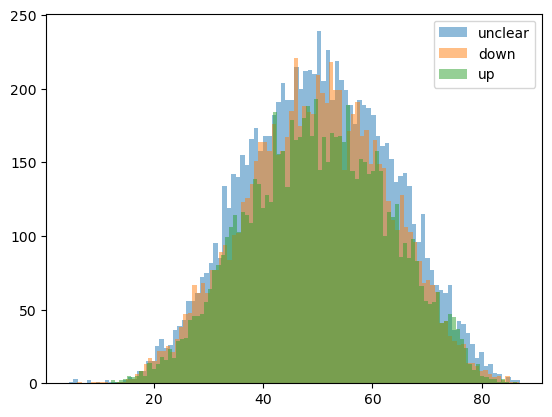

In [9]:
from matplotlib import pyplot
df_up=df.RSI[ df['mytarget'] == 2 ]
df_down=df.RSI[ df['mytarget'] == 1 ]
df_unclear=df.RSI[ df['mytarget'] == 0 ]
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

# Splitting features and target

In [10]:
df_model=df_model.dropna()

attributes=['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
X = df_model[attributes]
y = df_model["mytarget"]

print(X)

            Volume       ATR        RSI   Average      MA40      MA80  \
226     30819.0005  0.006321  50.482012  1.313050  1.312169  1.302708   
227     30091.3003  0.006406  43.108007  1.310755  1.312348  1.302841   
228     88171.8018  0.006344  40.445424  1.306645  1.312455  1.302940   
229    113875.4014  0.006266  46.168746  1.307270  1.312704  1.303175   
230     30057.7993  0.006115  44.726558  1.308240  1.312863  1.303375   
...            ...       ...        ...       ...       ...       ...   
36061    9823.3500  0.002228  51.969588  0.997020  0.995456  0.995573   
36062   18037.9099  0.002275  58.634693  0.998065  0.995547  0.995664   
36063   18995.1404  0.002255  53.583681  0.997840  0.995588  0.995746   
36064   38082.8598  0.002243  57.377080  0.998205  0.995692  0.995809   
36065   12273.9898  0.002177  58.034395  0.998905  0.995767  0.995886   

          MA160  slopeMA40  slopeMA80  slopeMA160  AverageSlope  RSISlope  
226    1.306960   0.000259   0.000268   -0.0001

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Fitting the KNN model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


# Quick evaluation of our fitting

In [13]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 37.73%
Accuracy test: 34.71%
0.0    36.382146
1.0    32.216132
2.0    31.401723
Name: mytarget, dtype: float64
Accuracy Gambler: 34.55%


# More Powerful model XGBoost

In [14]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 82.8847%
****Test Results****
Accuracy: 48.5904%


# Data sampling shouldn't be random

In [15]:
#random sampling
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#sequential sampling
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 82.3072%
****Test Results****
Accuracy: 35.1018%


# Which features are most important for our model?

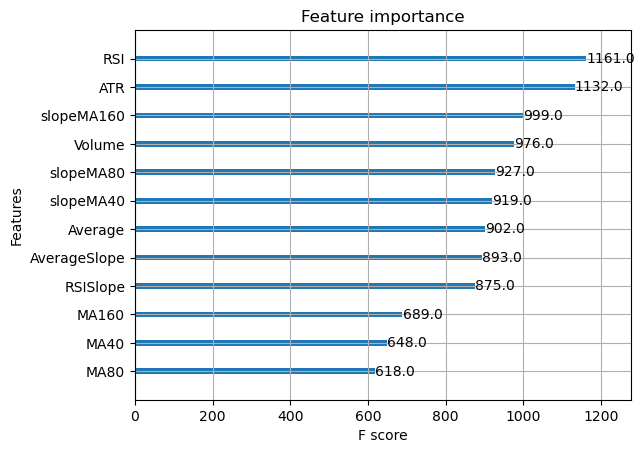

In [16]:
from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()

# Load Machine Learning Model from Disk and Test it

In [17]:
import joblib

# save your ML model to disk
filename = 'mymodel1.sav'
joblib.dump(model, filename)

#load the model from disk
loaded_model = joblib.load('mymodel1.sav')

# Live Automated Orders with email notification

In [18]:
from apscheduler.schedulers.blocking import BlockingScheduler
import json
from oandapyV20 import API
import oandapyV20.endpoints.orders as orders
from oandapyV20.contrib.requests import MarketOrderRequest
from oanda_candles import Pair, Gran, CandleCollector
from oandapyV20.contrib.requests import TakeProfitDetails, StopLossDetails


import smtplib
gmail_user = 'hofong.chang@gmail.com'
gmail_password = '2Xjioljl'
sent_from = gmail_user
to = ['hofong1966@outlook.com']
subject = 'info CHF'


In [19]:
ModelPrediction = 0
def some_job():
    access_token="INSERT TOKEN HERE, YOU GET IT FROM YOUR OANDA ACCOUNT"
    collector = CandleCollector(access_token, Pair.USD_CHF, Gran.H4)
    candles = collector.grab(2*161)

    dfstream = pd.DataFrame(columns=['Open','Close','High','Low'])
    i=0
    for candle in candles:
        dfstream.loc[i, ['Open']] = float(str(candle.bid.o))
        dfstream.loc[i, ['Close']] = float(str(candle.bid.c))
        dfstream.loc[i, ['High']] = float(str(candle.bid.h))
        dfstream.loc[i, ['Low']] = float(str(candle.bid.l))
        i=i+1

    dfstream['Open'] = dfstream['Open'].astype(float)
    dfstream['Close'] = dfstream['Close'].astype(float)
    dfstream['High'] = dfstream['High'].astype(float)
    dfstream['Low'] = dfstream['Low'].astype(float)

    #dfstream['Average'] = (dfstream['High']+dfstream['Low'])/2
    #dfstream['MA40'] = dfstream['Open'].rolling(window=40).mean()
    #dfstream['MA80'] = dfstream['Open'].rolling(window=80).mean()
    #dfstream['MA160'] = dfstream['Open'].rolling(window=160).mean()
    
    import numpy as np
    import pandas_ta as ta
    #attributes=['ATR', 'RSI', 'Average', 
    #'MA40', 'MA80', 'MA160', 'slopeMA40', 
    #'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
    dfstream['ATR'] = dfstream.ta.atr(length=20)
    dfstream['RSI'] = dfstream.ta.rsi()
    dfstream['Average'] = dfstream.ta.midprice(length=1) #midprice
    dfstream['MA40'] = dfstream.ta.sma(length=40)
    dfstream['MA80'] = dfstream.ta.sma(length=80)
    dfstream['MA160'] = dfstream.ta.sma(length=160)

#from scipy.stats import linregress
#def get_slope(array):
#    y = np.array(array)
#    x = np.arange(len(y))
#    slope, intercept, r_value, p_value, std_err = linregress(x,y)
#    return slope

    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    backrollingN = 6
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    dfstream['slopeMA40'] = dfstream['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['slopeMA80'] = dfstream['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['slopeMA160'] = dfstream['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['AverageSlope'] = dfstream['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['RSISlope'] = dfstream['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

    #________________________________________________________________________________________________
    X_stream = dfstream.iloc[[320]]# !!! Index takes last CLOSED candle
    #attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 
    #'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
    X_model = X_stream[attributes]
    
    # Apply the model for predictions
    ModelPrediction = loaded_model.predict(X_model)
  
    msg = str(ModelPrediction) # 0 no clear trend, 1 downtrend, 2 uptrend
    #------------------------------------
    # send email with 
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    server.login(gmail_user, gmail_password)
    server.sendmail(sent_from, to, msg)
    server.close()
    #________________________________________________________________________________________________
    
    
    # EXECUTING ORDERS
    accountID = "1432-432-0000" #use your account ID
    client = API(access_token)

    candles = collector.grab(1)
#    for candle in candles:
#        print(candle.bid.o)
#        print(candle.bid.c)
    
    pipdiff = 500*1e-5 #for TP
    SLTPRatio = 2 #pipdiff/Ratio gives SL
    
    TPBuy = float(str(candle.bid.o))+pipdiff
    SLBuy = float(str(candle.bid.o))-(pipdiff/SLTPRatio)
    TPSell = float(str(candle.bid.o))-pipdiff
    SLSell = float(str(candle.bid.o))+(pipdiff/SLTPRatio)
    
    #Sell
    if ModelPrediction == 1:
        mo = MarketOrderRequest(instrument="USD_CHF", units=-1000, takeProfitOnFill=TakeProfitDetails(price=TPSell).data, stopLossOnFill=StopLossDetails(price=SLSell).data)
        r = orders.OrderCreate(accountID, data=mo.data)
        rv = client.request(r)
        print(rv)
    #Buy
    elif ModelPrediction == 2:
        mo = MarketOrderRequest(instrument="USD_CHF", units=1000, takeProfitOnFill=TakeProfitDetails(price=TPBuy).data, stopLossOnFill=StopLossDetails(price=SLBuy).data)
        r = orders.OrderCreate(accountID, data=mo.data)
        rv = client.request(r)
        print(rv)

## Executing orders automatically every 4 Hours

In [ ]:
#some_job()

###################################################################
## Interval time job ##############################################

from apscheduler.schedulers.blocking import BlockingScheduler
from apscheduler.triggers.cron import CronTrigger
 
scheduler = BlockingScheduler(job_defaults={'misfire_grace_time': 15*60})
trigger = CronTrigger(day_of_week='mon-fri', hour='*/4', minute=5, jitter=120, timezone='America/New_York')
scheduler.add_job(some_job, trigger)
scheduler.start()
